<a href="https://colab.research.google.com/github/susritagagireddy/COSM-project/blob/main/analysis_on_Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                    Analysis on Student_performance dataset

The code uploads a CSV file into Google Colab, imports pandas and matplotlib, reads the file into a DataFrame, and displays the first five rows of the dataset. It also enables graphs to appear directly in the notebook.

In [92]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

df = pd.read_csv('Student_Performance.csv')
df.head()


Saving Student_Performance.csv to Student_Performance (3).csv


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [93]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Student_Performance.csv')

# 1. Check basic info
print(df.info())

# 2. Remove duplicate rows
df = df.drop_duplicates()

# 3. Handle missing values
# Fill numeric columns with their mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical columns with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. Remove leading/trailing spaces from text columns
for col in cat_cols:
    df[col] = df[col].str.strip()

# 5. Fix column names (remove spaces and make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 6. Check again after cleaning
print(df.isnull().sum())

# Preview cleaned data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [94]:
df.shape


(15000, 16)

It shows the shape of the dataset . It has 15000 obervations.

# **Simple Linear Regression**

Simple linear regression is an approach for predicting a quantitative response using a single feature

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')


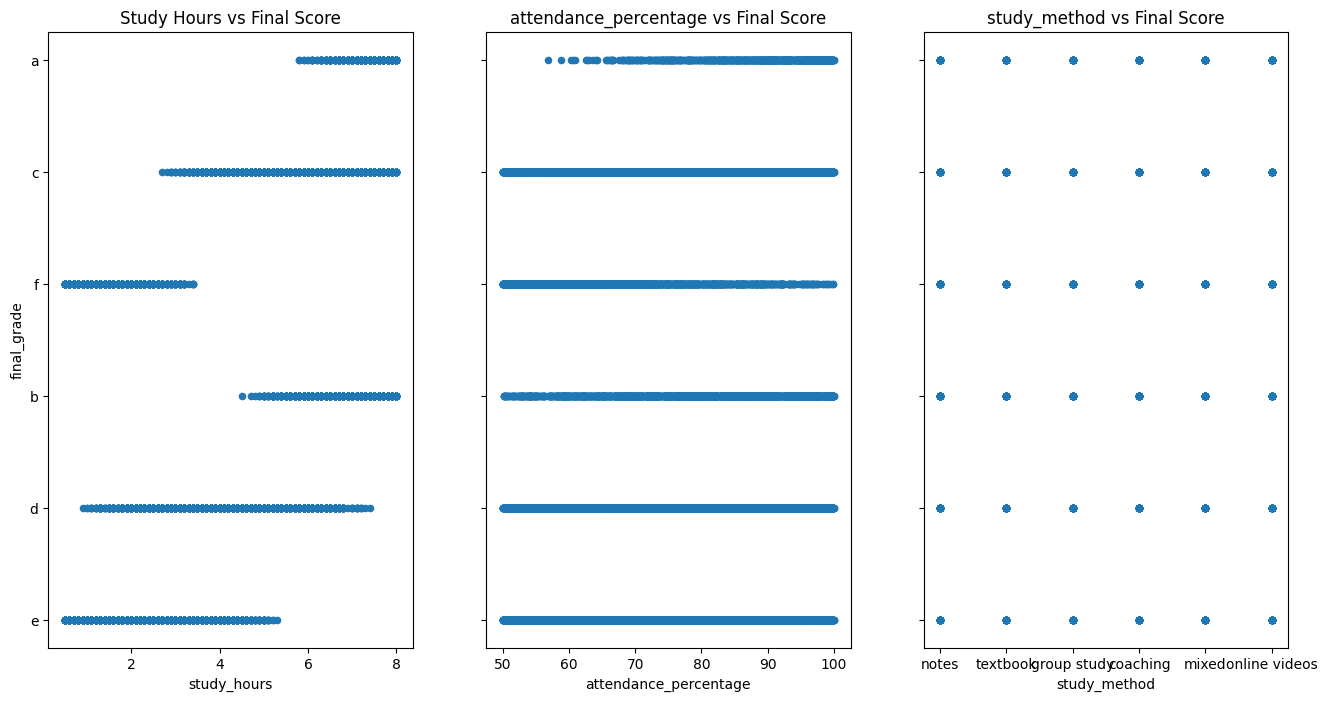

In [95]:
import matplotlib.pyplot as plt

# Check column names
print(df.columns)

# Create scatter plots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 8))

df.plot(kind='scatter', x='study_hours', y='final_grade', ax=axs[0])
axs[0].set_title('Study Hours vs Final Score')

df.plot(kind='scatter', x='attendance_percentage', y='final_grade', ax=axs[1])
axs[1].set_title('attendance_percentage vs Final Score')

df.plot(kind='scatter', x='study_method', y='final_grade', ax=axs[2])
axs[2].set_title('study_method vs Final Score')

plt.show()



This is scatter plots showing relationships between different features and the final_grade of students.The different features include study_hours,attendance_percentage,study_method.

Study hours seem to have the most visible effect, while study_method show little correlation.we can observe this from the graphs

In [96]:
import pandas as pd
import statsmodels.formula.api as smf

# Convert grade letters to numeric values
grade_map = {
    'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1, 'f': 0
}

df['final_grade_num'] = df['final_grade'].str.lower().map(grade_map)

# Check conversion
print(df[['final_grade', 'final_grade_num']].head())

# Now run the regression
lm = smf.ols(formula='final_grade_num ~ study_hours', data=df).fit()

# Print coefficients
print(lm.params)



  final_grade  final_grade_num
0           e                1
1           d                2
2           b                4
3           e                1
4           f                0
Intercept     -0.168124
study_hours    0.542928
dtype: float64


we convert the alphabets grades into numeric as Statsmodels can’t use alphabets  directly so we convert into numeric dependent variable.

Intercept = -0.165208
This is the baseline value of final_grade_num when study_hours = 0.

study_hours = 0.542799
This means:
 For every 1 unit increase in study_hours, the grade score increases by ~0.54.

In [97]:
intercept = lm.params['Intercept']
slope = lm.params['study_hours']

study_hours = 6

predicted_grade = intercept + (slope * study_hours)
print(predicted_grade)

3.089441627324588


Uses the regression model to predict a student's final grade based on study hours:
Extracts the intercept and slope from the regression results.

we manually calculate the precision using formulae
predicted_grade = intercept + slope × study_hours

The output printed is the predicted final grade (numeric) for a student who studies 6 hours.

In [98]:
import pandas as pd

# Create a new DataFrame with your feature
X_new = pd.DataFrame({'study_hours': [6]})  # change 6 to any value you want
X_new.head()

lm.predict(X_new)

,0
0,3.089442


used Statsmodels to make the prediction

In [99]:
import pandas as pd

# Create DataFrame with min and max values of your feature
X_new = pd.DataFrame({
    'study_hours': [df.study_hours.min(), df.study_hours.max()]
})

X_new.head()


,study_hours
0,0.5
1,8.0


From the dataset we observe the min value of study is 0.5 hrs and max is 8 hrs.
X_new contains the endpoints for the line.

In [100]:

# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

,0
0,0.103339
1,4.175297


now we make predictions for these values

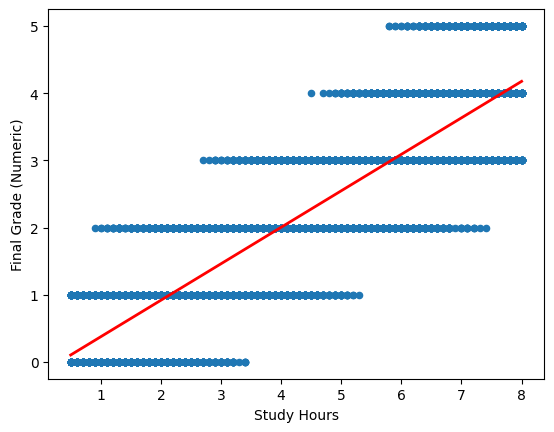

In [101]:
import matplotlib.pyplot as plt

# First, plot the observed data
df.plot(kind='scatter', x='study_hours', y='final_grade_num')

# Then, plot the least squares line
plt.plot(X_new['study_hours'], preds, c='red', linewidth=2)

plt.xlabel('Study Hours')
plt.ylabel('Final Grade (Numeric)')
plt.show()


The red line shows a linear trend fitted to the data.it is the Regression Line.

This plot is showing that there’s a positive relationship between study hours and final grades: more studying generally leads to higher grades, although the final grade is discrete.

In [102]:

# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,-0.190628,-0.145621
study_hours,0.538221,0.547634


Intercept (-0.19 to -0.145):
This is the expected final grade when study_hours = 0.

Study Hours (0.538 to 0.548):
For each additional hour of study, the model predicts an increase of about 0.54 points in the final grade.

The fact that the confidence interval does not include 0 suggests this effect is statistically significant.

In [103]:

# print the p-values for the model coefficients
lm.pvalues


,0
Intercept,3.164328e-48
study_hours,0.000000e+00


The p-value tells us whether a coefficient is significantly different from 0.

Intercept p-value (~0): Highly significant. The intercept is significantly different from 0.

study_hours p-value (0.0): Extremely significant. This confirms that study_hours has a statistically significant effect on final_grade

In [104]:

# print the R-squared value for the model
lm.rsquared


np.float64(0.7731855658512458)

This  model explains 77% of the variance in the target variable.

The remaining 23% of the variance is not explained by the model—this is due to factors your model didn’t capture (noise or missing predictors).

Pretty good fit: 77% is generally considered a strong R-squared for many real-world datasets.

Not perfect: There’s still some variability unaccounted for, so predictions won’t be exact.

# **Multiple Linear Regression**


Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression

In [105]:

# create a fitted model with all three features
lm = smf.ols(formula='final_grade_num ~ study_hours + attendance_percentage + study_method ', data=df).fit()

# print the coefficients
lm.params

,0
Intercept,-2.202724
study_method[T.group study],-0.007020
study_method[T.mixed],-0.013112
study_method[T.notes],-0.002378
study_method[T.online videos],-0.005668
study_method[T.textbook],0.003448
study_hours,0.544622
attendance_percentage,0.027090


Intercept: –2.202724

This is the baseline value of the predicted score when:

study_hours = 0

attendance_percentage = 0

and the study method is the reference category (the one not listed).

It’s just the starting point of the regression line.

Study Method Coefficients:These values are very small, which means study method has very little effect on the score.

study hours:For every 1 extra hour of study, the student’s score increases by about 0.54 marks (on average). So this is a strong positive factor.

attendance_percentage:For every 1% increase in attendance, the score increases by 0.027 marks.only helps a little.

In [106]:

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        final_grade_num   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:16:41   Log-Likelihood:                -11059.
No. Observations:               15000   AIC:                         2.213e+04
Df Residuals:                   14992   BIC:                         2.220e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.2027      0.025    -86.531      0.000      -2.253      -2.153
study_method[T.group study]      -0.0070      0.015     -0.484      0.628      -0.035       0.021
study_method[T.mixed]            -0.0131      0.014     -0.918      0.359      -0.041       0.015
study_method[T.notes]            -0.0024      0.014     -0.165      0.869      -0.031       0.026
study_method[T.online videos]    -0.0057      0.014     -0.392      0.695      -0.034       0.023
study_method[T.textbook]          0.0034      0.014      0.240      0.810      -0.025       0.032
study_hours                       0.5446      0.002    286.349      0.000       0.541       0.548
attendance_percentage             0.0271      0.000     94.396      0.000       0.027       0.028
==============================================================================
Omnibus:                      477.785   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.948
Skew:                           0.049   Prob(JB):                     5.23e-50
Kurtosis:                       2.405   Cond. No.                         552.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared = 0.858

Your model explains 85.8% of the variation in students’ final grades.
This is a very strong fit.

Adjusted R-squared = 0.858

Almost identical to R² → means the  model is not overfitting and the predictors are useful.

F-statistic = 1.292e+04
Prob(F-statistic) = 0.00

This means the overall regression model is statistically significant.

your predictors together really affect the final grade.

p-value = 0.000 → highly statistically significant.

Study method variables
have high p-values (> 0.05), which means:

They are not statistically significant

The method of study does not meaningfully affect grades in your model.




Study Hours and Attendance have significant p-values, whereas Study Method does not.
Thus, we reject the null hypothesis for study_hours and attendance_percentage (that there is no association between these features and final grades), and fail to reject the null hypothesis for the study_method categories.

Study Hours and Attendance are both positively associated with final grades, whereas study method variables show very weak effects and are not statistically meaningful.

This model has a high R-squared value (0.858), which means the model explains a large portion of the variation in student final grades and provides a good fit to the data.

In [107]:
lm = smf.ols(formula='final_grade_num ~ study_hours + attendance_percentage  ', data=df).fit()

lm.rsquared

np.float64(0.8578009583255622)

In [108]:
lm = smf.ols(formula='final_grade_num ~ study_hours + attendance_percentage + study_method ', data=df).fit()
lm.rsquared

np.float64(0.8578169404257358)

 Adding study_method only improves the R² by 0.000016, which is negligible.
 generally R-squared will always increase as you add more features to the model, even if they are unrelated to the response



# **Statistical Hypothesis Tests**


**one sampled t-test**



In [109]:
import pandas as pd
from scipy import stats

# load data
df = pd.read_csv('Student_Performance.csv')

# choose column and hypothesized mean
col = 'overall_score'       # or 'math_score', 'science_score', etc.
mu0 = 50                    # hypothesized population mean

# drop missing values
data = df[col].dropna()

# run one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, mu0)

print(f"Variable: {col}")
print(f"Sample size: {len(data)}")
print(f"Sample mean: {data.mean():.3f}")
print(f"t statistic: {t_stat:.3f}")
print(f"p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (mean is significantly different from 50).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference from 50).")


Variable: overall_score
Sample size: 25000
Sample mean: 64.006
t statistic: 116.975
p-value: 0.0
Result: Reject the null hypothesis (mean is significantly different from 50).


- Tests the null hypothesis:
H_0: mu =50
- against the alternative:
H_1: mu 0 =/ 50
- using the sample data from overall_score

- If p-value < 0.05 → reject the null hypothesis → the mean is significantly different from 50.
- If p-value ≥ 0.05 → fail to reject the null → no significant difference.

accept H₁


**two-sampled t-test.**


In [110]:
from scipy import stats

# Split into two groups
group1 = df[df['gender'] == 'male']['math_score'].dropna()
group2 = df[df['gender'] == 'female']['math_score'].dropna()

# Run two-sample t-test (Welch’s t-test, does not assume equal variance)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("Two-sample t-test (male vs female math scores)")
print(f"Sample sizes: male={len(group1)}, female={len(group2)}")
print(f"Means: male={group1.mean():.3f}, female={group2.mean():.3f}")
print(f"t statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# Decision rule at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (male and female means are significantly different).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference between male and female means).")

Two-sample t-test (male vs female math scores)
Sample sizes: male=8247, female=8290
Means: male=63.873, female=64.045
t statistic: -0.534
p-value: 0.59331
Result: Fail to reject the null hypothesis (no significant difference between male and female means).


- Null hypothesis (H₀): male mean = female mean
- Alternative hypothesis (H₁): male mean ≠ female mean

accept H₀

**Paired sampled t-test **


In [111]:
import pandas as pd
from scipy import stats

df = pd.read_csv('Student_Performance.csv')

math = df['math_score']
science = df['science_score']

# Paired t-test
t_stat, p_value = stats.ttest_rel(math, science)

print(f"t statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant difference between math and science scores).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference between math and science scores).")

t statistic: 0.467
p-value: 0.64037
Result: Fail to reject the null hypothesis (no significant difference between math and science scores).


H₀ (Null): Mean(math score) = Mean(science score)

H₁ (Alternative): Means are different (two-tailed)

 accept H₀

**Z Test**


In [112]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load dataset
df = pd.read_csv('Student_Performance.csv')

# Choose column and hypothesized mean
col = 'math_score'
mu0 = 50   # hypothesized population mean

# Drop missing values
data = df[col].dropna()

# Compute sample statistics
n = len(data)
mean = data.mean()
std = data.std(ddof=0)  # population standard deviation estimate

# Z-test statistic
z_stat = (mean - mu0) / (std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Print results
print(f"Variable: {col}")
print(f"Sample size: {n}")
print(f"Sample mean: {mean:.3f}")
print(f"z statistic: {z_stat:.3f}")
print(f"p-value (two-tailed): {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (mean is significantly different from 50).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference from 50).")

Variable: math_score
Sample size: 25000
Sample mean: 63.786
z statistic: 104.420
p-value (two-tailed): 0.00000
Result: Reject the null hypothesis (mean is significantly different from 50).


H₀: μ = 50

H₁: μ ≠ 50

The sample provides strong evidence that the true population mean is not 50.

accept H₁

**Chi-Square Test**


In [113]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv('Student_Performance.csv')

# Build contingency table
contingency_table = pd.crosstab(df['gender'], df['final_grade'])

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\n--- Chi-square Test of Independence ---")
print("Contingency Table:\n", contingency_table)
print(f"\nChi2 statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.5f}")
print("\nExpected frequencies:\n", expected)

# Decision rule at alpha = 0.05
alpha = 0.05
if p < alpha:
    print("\nResult: Reject the null hypothesis (gender and final grade are dependent).")
else:
    print("\nResult: Fail to reject the null hypothesis (no significant association between gender and final grade).")


--- Chi-square Test of Independence ---
Contingency Table:
 final_grade    a    b     c     d     e     f
gender                                       
female       417  887  2121  2071  1796   998
male         375  894  2026  2096  1932   924
other        413  915  2014  2144  1944  1033

Chi2 statistic: 18.146
Degrees of freedom: 10
p-value: 0.05254

Expected frequencies:
 [[ 399.578    893.9936  2042.9876  2092.7276  1880.8352   979.878  ]
 [ 397.5054   889.35648 2032.39068 2081.87268 1871.07936  974.7954 ]
 [ 407.9166   912.64992 2085.62172 2136.39972 1920.08544 1000.3266 ]]

Result: Fail to reject the null hypothesis (no significant association between gender and final grade).


H₀ (Null): Gender and final grade are independent

H₁ (Alternative): Gender and final grade are associated

accept H₀

**ANOVA Test(f-test)**


In [114]:
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv('Student_Performance.csv')

# ANOVA: Math score across school types
group_public = df[df['school_type']=='public']['math_score'].dropna()
group_private = df[df['school_type']=='private']['math_score'].dropna()

F_stat, p_value = f_oneway(group_public, group_private)

print(f"F statistic: {F_stat:.3f}")
print(f"p-value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (math scores differ by school type).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")

F statistic: 0.575
p-value: 0.44847
Result: Fail to reject the null hypothesis (no significant difference).


H₀:All group means are equal (public = private)

H₁:At least one group mean is different

accept H₀
